# Data Loading

In [ ]:
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00507/wisdm-dataset.zip'
# Loading the dataset from the repository

In [ ]:
import zipfile #for extracting zip file
with zipfile.ZipFile('./wisdm-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [1]:
from scipy.io import arff
import os

import numpy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
import seaborn as sns
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt


# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
# from lightgbm import LGBMClassifier

# To measure time
from time import time

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]}) 

In [2]:
import boto3
import sagemaker

# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [3]:
def arff_file_to_df(filename):
    #convert arff files to pandas data frame
    data = arff.loadarff(filename)
    df = pd.DataFrame(data[0])
    
    return df

In [4]:
path = 'wisdm-dataset'
files = []
frames = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.arff' in file:
            files.append(os.path.join(r, file))
for file in files:
    df = arff_file_to_df(file)
    frames.append(df)

In [5]:
df = pd.concat(frames)
#Appendding all the dataframes row wise to create a single dataframe df

In [6]:
df.shape

(75099, 93)

In [7]:
df.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.170,0.315,0.435,0.06,0.010,0.0,0.01,0.0,0.0,...,0.433341,0.427773,-0.188714,0.141920,-0.062945,-0.204853,0.140685,-0.067840,3.86209,b'1619'
1,b'A',0.125,0.310,0.485,0.08,0.000,0.0,0.00,0.0,0.0,...,0.386114,0.381152,-0.371368,0.198086,0.442477,-0.372734,0.199274,0.446024,3.23334,b'1619'
2,b'A',0.150,0.320,0.485,0.04,0.005,0.0,0.00,0.0,0.0,...,0.405939,0.400722,-0.522678,-0.038708,0.519698,-0.517238,-0.038878,0.525614,2.93205,b'1619'
3,b'A',0.190,0.220,0.430,0.16,0.000,0.0,0.00,0.0,0.0,...,0.426505,0.421024,-0.642675,0.057995,0.128622,-0.643005,0.057987,0.129048,3.83345,b'1619'
4,b'A',0.205,0.240,0.370,0.17,0.015,0.0,0.00,0.0,0.0,...,0.469978,0.463939,-0.603190,-0.031606,0.137222,-0.603988,-0.031405,0.138634,4.36682,b'1619'


# Data Cleaning

In [8]:
df.columns=df.columns.str.replace('"','')
# Remove quotes from column names
def clean_column(column_name):
    #remmove quotes and unnecessary characters from the column values
    df[column_name] = df[column_name].astype(str).str.replace('b','')
    df[column_name] = df[column_name].astype(str).str.replace("'",'')
    
    return df[column_name]

df['ACTIVITY'] = clean_column('ACTIVITY')
df['class'] = clean_column('class')

In [9]:
df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.170,0.315,0.435,0.06,0.010,0.0,0.01,0.0,0.0,...,0.433341,0.427773,-0.188714,0.141920,-0.062945,-0.204853,0.140685,-0.067840,3.86209,1619
1,A,0.125,0.310,0.485,0.08,0.000,0.0,0.00,0.0,0.0,...,0.386114,0.381152,-0.371368,0.198086,0.442477,-0.372734,0.199274,0.446024,3.23334,1619
2,A,0.150,0.320,0.485,0.04,0.005,0.0,0.00,0.0,0.0,...,0.405939,0.400722,-0.522678,-0.038708,0.519698,-0.517238,-0.038878,0.525614,2.93205,1619
3,A,0.190,0.220,0.430,0.16,0.000,0.0,0.00,0.0,0.0,...,0.426505,0.421024,-0.642675,0.057995,0.128622,-0.643005,0.057987,0.129048,3.83345,1619
4,A,0.205,0.240,0.370,0.17,0.015,0.0,0.00,0.0,0.0,...,0.469978,0.463939,-0.603190,-0.031606,0.137222,-0.603988,-0.031405,0.138634,4.36682,1619


In [10]:
activty_map = {
    'A': 'walking',
    'B': 'jogging',
    'C': 'stairs',
    'D': 'sitting',
    'E': 'standing',
    'F': 'typing',
    'G': 'teeth',
    'H': 'soup',
    'I': 'chips',
    'J': 'pasta',
    'K': 'drinking',
    'L': 'sandwich',
    'M': 'kicking',
    'O': 'catch',
    'P': 'dribbling',
    'Q': 'writing',
    'R': 'clapping',
    'S': 'folding'
}

In [11]:
# temp_activity_df = df.iloc[:,0]
# temp_class_df = df.iloc[:,92]
# temp_df = df.iloc[:,1:92].astype(numpy.float32)
# df = pd.concat([temp_df, temp_class_df, temp_activity_df], axis=1)
# print(df.head())

# Data Visualization

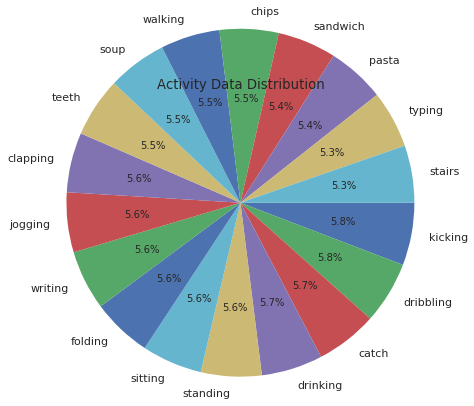

In [12]:
temp = df.ACTIVITY.value_counts()
values = temp.values
labels = list(temp.index)

labels = [activty_map[label] for label in labels]

plt.pie(values, labels=labels, autopct='%1.1f%%',counterclock=False, radius=2)
plt.title('Activity Data Distribution')
plt.show()
# Visualizing the activity data

#### The data is uniformly distributed amongst the activity labels.

<BarContainer object of 50 artists>

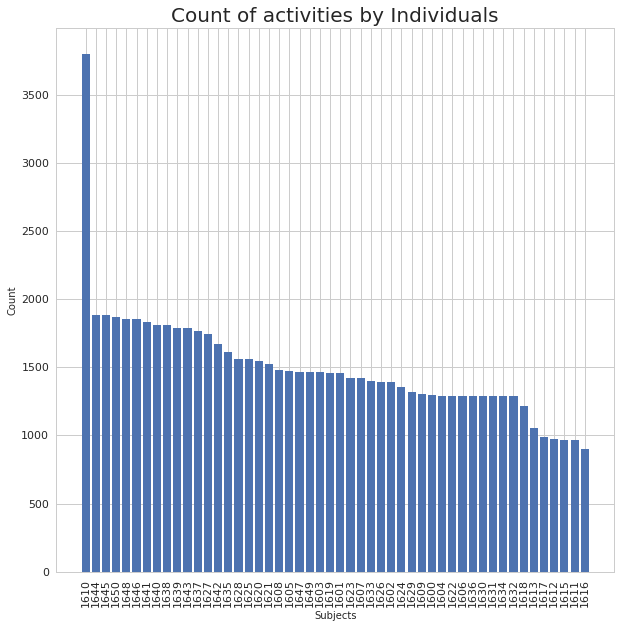

In [13]:
temp = df['class'].value_counts()
values = temp.values
labels = list(temp.index)
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.xlabel('Subjects', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of activities by Individuals', fontsize=20)
plt.bar(labels, values)

In [14]:
# Get the datatypes of columns
df.describe()

# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75099 entries, 0 to 407
Data columns (total 93 columns):
ACTIVITY     75099 non-null object
X0           75099 non-null float64
X1           75099 non-null float64
X2           75099 non-null float64
X3           75099 non-null float64
X4           75099 non-null float64
X5           75099 non-null float64
X6           75099 non-null float64
X7           75099 non-null float64
X8           75099 non-null float64
X9           75099 non-null float64
Y0           75099 non-null float64
Y1           75099 non-null float64
Y2           75099 non-null float64
Y3           75099 non-null float64
Y4           75099 non-null float64
Y5           75099 non-null float64
Y6           75099 non-null float64
Y7           75099 non-null float64
Y8           75099 non-null float64
Y9           75099 non-null float64
Z0           75099 non-null float64
Z1           75099 non-null float64
Z2           75099 non-null float64
Z

# Data Preprocessing

In [15]:
def activty_mapper(activity):
    if(activity in ['A', 'B', 'C', 'D', 'E', 'M']):
        return 0
    elif(activity in ['P', 'O', 'F', 'Q', 'R','G', 'S']):
        return 1
    else:
        return 2

df['ACTIVITY'] = df['ACTIVITY'].apply(activty_mapper)

In [16]:
df = df.sample(frac=1, random_state=1)
# Shuffle the data inside the dataframe
print(df.head())

     ACTIVITY    X0    X1    X2   X3   X4   X5   X6   X7   X8  ...   ZMFCC11  \
481         0  0.04  0.85  0.11  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.398749   
300         1  0.00  0.46  0.54  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.518413   
84          0  0.00  0.58  0.42  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.599415   
58          0  0.00  1.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.438649   
154         1  1.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.437647   

      ZMFCC12     XYCOS     XZCOS     YZCOS     XYCOR     XZCOR     YZCOR  \
481  0.393625 -0.739168 -0.574235  0.576139  0.226855 -0.211418 -0.596378   
300 -0.511751 -0.758820 -0.079382  0.485555 -0.755616 -0.082952  0.490093   
84  -0.591712 -0.056533  0.159908  0.085791 -0.070513  0.152080  0.077642   
58   0.433012  0.990842 -0.998585 -0.991308  0.104353  0.031198  0.169282   
154  0.432024 -0.701279 -0.998312  0.702214  0.016179  0.111496 -0.099057   

     RESULTANT  class  
481  10.144800   1642  
300   0.

In [17]:
individuals = df.pop('class')
activity = df.pop('ACTIVITY')
#get the ids of the indiviual in a separate list and remove that colummn from data frame

In [18]:
activty_map = {
    0: 'Non Hand Oriented',
    1: 'Hand Oriented General',
    2: 'Hand Oriented Eating'
}

In [19]:
# Plotting data
label_counts = activity.value_counts()

x_labels = [activty_map[index] for index in label_counts.index]
# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = x_labels,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Human Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

#### We observe that the distribution of data in the three groups is not entirely uniform. 

## Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
# we scale the values of columns so that all the values are between 0 and 1
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [35]:
features = df.to_numpy(dtype=np.float32)
activity_labels = activity.to_numpy(dtype=np.float32)


In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(features, activity_labels, test_size = 0.2, random_state = 0)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size = 0.5, random_state = 0)

In [37]:
# check that division of samples seems correct
# these should add up to 95 (100 - 5 original files)
print('Training size: ', len(xTrain))
print('Test size: ', len(xTest))
print('Validation size: ', len(xVal))

print()
print('Training df sample: \n', xTrain[:10])

Training size:  60079
Test size:  7510
Validation size:  7510

Training df sample: 
 [[0.00000000e+00 5.60000002e-01 4.39999998e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.49999976e-01
  3.49999994e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.35000008e-01 6.65000021e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.58920598e-01 6.53594494e-01
  5.20891130e-01 5.20741567e-02 8.50413963e-02 6.15954632e-03
  9.02114494e-04 7.02926714e-04 2.60425790e-04 8.41249654e-04
  7.13959394e-04 2.32849212e-04 2.41695400e-02 2.28345431e-02
  1.15161026e-02 2.72834957e-01 2.72834122e-01 2.72836149e-01
  2.72836417e-01 2.72833943e-01 2.72834420e-01 2.72835195e-01
  2.72834599e-01 2.72836179e-01 2.72833377e-01 2.72837132e-01
  2.72834837e-01 2.72833675e-01 3.11300963e-01 

In [38]:
linear_learner_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)

In [39]:
# create RecordSet
train_records = linear_learner_estimator.record_set(xTrain, yTrain, channel='train')
val_records = linear_learner_estimator.record_set(xVal, yVal, channel='validation')
test_records = linear_learner_estimator.record_set(xTest, yTest, channel='test')

In [ ]:
linear_learner_estimator.fit([train_records, val_records, test_records])

2020-01-24 17:45:39 Starting - Starting the training job...
2020-01-24 17:45:40 Starting - Launching requested ML instances...
2020-01-24 17:46:37 Starting - Preparing the instances for training......
2020-01-24 17:47:38 Downloading - Downloading input data...
2020-01-24 17:47:53 Training - Downloading the training image..Docker entrypoint called with argument(s): train
[01/24/2020 17:48:16 INFO 140276589545280] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u'au

In [ ]:
linear_learner_predictor = linear_learner_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

--------------------------------------------------------------------------!

In [45]:
def evaluate_metrics(predictor, test_features, test_labels):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(xTest, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    test_preds = test_preds.reshape((-1,))

    # calculate accuracy
    accuracy = (test_preds == test_labels).sum() / test_labels.shape[0]

    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: activty_map[x])
    confusion_matrix = pd.crosstab(label_mapper(test_labels), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')
    # display results
    plt.figure(figsize=(16, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.560


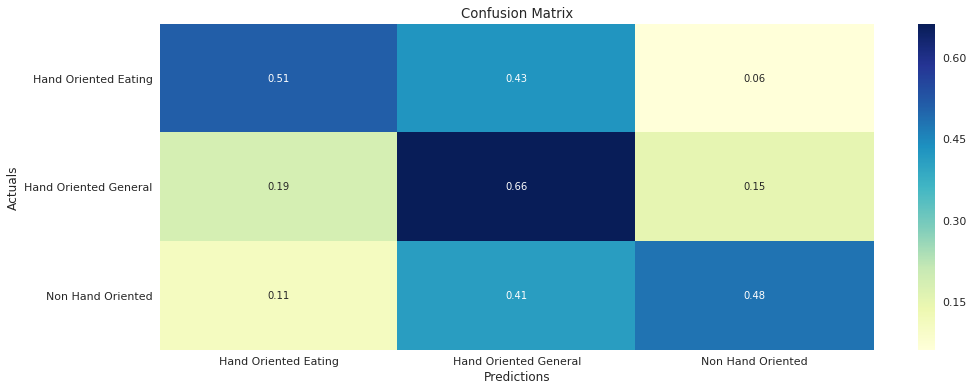

In [46]:
evaluate_metrics(linear_learner_predictor, xTest, yTest)


## Feature Selection

In [ ]:
# should be the name of directory you created to save your features data
data_dir = 'activity_data'

# set prefix, a descriptive name for a directory  
prefix = 'activity_data'

output_path = 's3://{}/{}'.format(bucket, prefix)

input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
print(input_data)

# upload all data to S3

In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



X = df  #independent columns
y = activity   #target column i.e activity

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
tenlarget = featureScores.nlargest(10,'Score')  #print 10 best features
print(tenlarget)
selected_features = tenlarget['Specs'].tolist()
print('selected_features', selected_features)

        Specs        Score
42       XVAR  1208.759578
43       YVAR  1139.774652
39  XSTANDDEV  1083.781498
36  XABSOLDEV  1070.791139
7          X7   970.931499
40  YSTANDDEV   906.095967
37  YABSOLDEV   902.136731
44       ZVAR   881.935620
6          X6   760.882796
24         Z4   713.046560
selected_features ['XVAR', 'YVAR', 'XSTANDDEV', 'XABSOLDEV', 'X7', 'YSTANDDEV', 'YABSOLDEV', 'ZVAR', 'X6', 'Z4']


In [57]:
features = df.filter(selected_features).to_numpy(dtype=np.float32)
#filter the dataframme to get only the 10 best columns values
activity_labels = activity.to_numpy()

In [58]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    
    # your code here
    pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)\
             .to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(features, activity_labels, test_size = 0.2, random_state = 0)
#get the train and test split for the SVM models

In [61]:
# check that division of samples seems correct
# these should add up to 95 (100 - 5 original files)
print('Training size: ', len(xTrain))
print('Test size: ', len(xTest))
print()
print('Training df sample: \n', xTrain[:10])

Training size:  60079
Test size:  15020

Training df sample: 
 [[0.02416954 0.02283454 0.00084125 0.00090211 0.         0.00071396
  0.00070293 0.0115161  0.         0.        ]
 [0.11350783 0.09438273 0.0139809  0.01551688 0.         0.00964575
  0.00980561 0.1113731  0.         0.        ]
 [0.02822756 0.03661668 0.0010958  0.00109826 0.         0.00164519
  0.00164558 0.03683381 0.         0.        ]
 [0.52763885 0.4936828  0.2811205  0.27412927 0.01052632 0.24587977
  0.23138976 0.4623356  0.025      0.06      ]
 [0.02220703 0.02011587 0.00072984 0.00079059 0.         0.00057474
  0.00058996 0.01154429 0.         0.        ]
 [0.09020344 0.02507647 0.00903122 0.00374016 0.         0.0008398
  0.00075177 0.04858614 0.         0.        ]
 [0.24410373 0.2724036  0.06159811 0.05826021 0.         0.07591432
  0.07669707 0.26938123 0.         0.        ]
 [0.4515078  0.36770114 0.2065596  0.24495876 0.         0.13721101
  0.14603937 0.3466096  0.         0.57      ]
 [0.37805337 0.214

In [62]:
data_dir = 'activity_data'

make_csv(xTrain, yTrain, filename='train.csv', data_dir=data_dir)
make_csv(xTest, yTest, filename='test.csv', data_dir=data_dir)

Path created: activity_data/train.csv
Path created: activity_data/test.csv


### Upload Data to S3

In [63]:
# should be the name of directory you created to save your features data
data_dir = 'activity_data'

# set prefix, a descriptive name for a directory  
prefix = 'activity_data'

input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
print(input_data)

s3://sagemaker-ap-south-1-724515668840/activity_data


### LinearSVC Model

In [66]:
from sagemaker.sklearn.estimator import SKLearn

output_path = 's3://{}/{}'.format(bucket, prefix)

linear_SVC_estimator = SKLearn(entry_point='train.py',
                            role=role,
                            train_instance_type='ml.m4.4xlarge',
                            train_instance_count=1,
                            output_path=output_path,
                            framework_version='0.20.0',
                            sagemaker_session=sagemaker_session,
                            hyperparameters = { 'tol': 0.0001 })


In [67]:
%%time

# Train your estimator on S3 training data
linear_SVC_estimator.fit({'train': input_data})

2020-01-24 18:29:01 Starting - Starting the training job...
2020-01-24 18:29:03 Starting - Launching requested ML instances...
2020-01-24 18:29:57 Starting - Preparing the instances for training...
2020-01-24 18:30:31 Downloading - Downloading input data...
2020-01-24 18:30:47 Training - Downloading the training image..2020-01-24 18:31:07,942 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-01-24 18:31:07,945 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-01-24 18:31:07,958 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-01-24 18:31:08,197 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-01-24 18:31:08,198 sagemaker-containers INFO     Generating setup.cfg
2020-01-24 18:31:08,198 sagemaker-containers INFO     Generating MANIFEST.in
2020-01-24 18:31:08,198 sagemaker-containers INFO     Installing module with the following command

In [68]:
%%time

# deploy your model to create a predictor
linear_SVC_predictor = linear_SVC_estimator.deploy(instance_type='ml.m4.xlarge',
                                     initial_instance_count=1)

----------------------------------------------------------------!CPU times: user 336 ms, sys: 18.6 ms, total: 355 ms
Wall time: 5min 23s


In [70]:
# read in test data, assuming it is stored locally
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

# labels are in the first column
test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

In [71]:
test_y_preds = linear_SVC_predictor.predict(test_x)

### Evaluation

In [74]:
def evaluate_metrics(test_labels, test_preds):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # calculate accuracy
    accuracy = (test_labels == test_preds).sum() / test_labels.shape[0]
    
    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: activty_map[x])
    confusion_matrix = pd.crosstab(label_mapper(test_labels), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')

    # display results
    plt.figure(figsize=(16, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.467


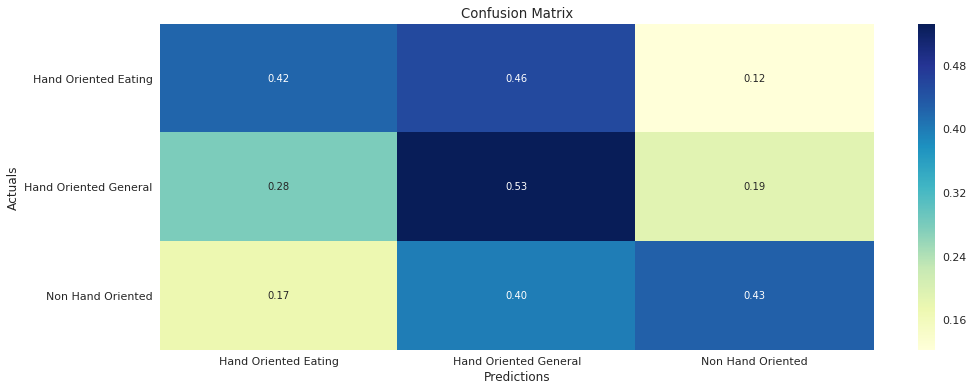

In [75]:
evaluate_metrics(test_y, test_y_preds)

### KNeighborsClassifier

In [77]:
from sagemaker.sklearn.estimator import SKLearn

output_path = 's3://{}/{}'.format(bucket, prefix)

KNN_estimator = SKLearn(entry_point='train_knn.py',
                            role=role,
                            train_instance_type='ml.m4.4xlarge',
                            train_instance_count=1,
                            output_path=output_path,
                            framework_version='0.20.0',
                            sagemaker_session=sagemaker_session)

In [78]:
%%time

# Train your estimator on S3 training data
KNN_estimator.fit({'train': input_data})

2020-01-24 18:53:38 Starting - Starting the training job...
2020-01-24 18:53:41 Starting - Launching requested ML instances...
2020-01-24 18:54:35 Starting - Preparing the instances for training......
2020-01-24 18:55:35 Downloading - Downloading input data
2020-01-24 18:55:35 Training - Downloading the training image..2020-01-24 18:55:48,899 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-01-24 18:55:48,902 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-01-24 18:55:48,914 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-01-24 18:55:49,150 sagemaker-containers INFO     Module train_knn does not provide a setup.py. 
Generating setup.py
2020-01-24 18:55:49,150 sagemaker-containers INFO     Generating setup.cfg
2020-01-24 18:55:49,150 sagemaker-containers INFO     Generating MANIFEST.in
2020-01-24 18:55:49,151 sagemaker-containers INFO     Installing module with the following com

In [79]:
%%time

# deploy your model to create a predictor
KNN_predictor = KNN_estimator.deploy(instance_type='ml.m4.xlarge',
                                     initial_instance_count=1)

-------------------------------------------------------------!CPU times: user 320 ms, sys: 11.3 ms, total: 331 ms
Wall time: 5min 7s


In [80]:
test_y_preds = KNN_predictor.predict(test_x)

Accuracy: 0.613


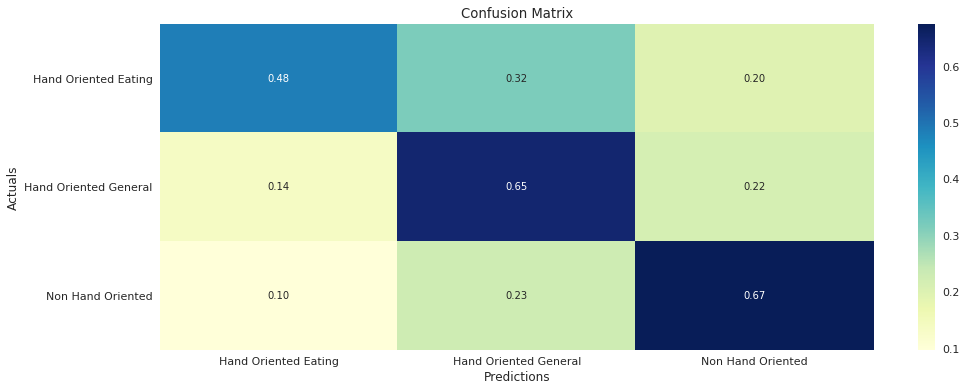

In [81]:
evaluate_metrics(test_y, test_y_preds)

### KNeighborsClassifier - Hyperparameter Tuning(n_neighbors)

In [82]:
KNN_estimator = SKLearn(entry_point='train_knn.py',
                            role=role,
                            train_instance_type='ml.m4.4xlarge',
                            train_instance_count=1,
                            output_path=output_path,
                            framework_version='0.20.0',
                            sagemaker_session=sagemaker_session,
                            hyperparameters = { 'n_neighbors': 3 })

In [83]:
%%time

# Train your estimator on S3 training data
KNN_estimator.fit({'train': input_data})

2020-01-24 19:08:18 Starting - Starting the training job...
2020-01-24 19:08:21 Starting - Launching requested ML instances......
2020-01-24 19:09:42 Starting - Preparing the instances for training......
2020-01-24 19:10:43 Downloading - Downloading input data
2020-01-24 19:10:43 Training - Downloading the training image..2020-01-24 19:10:56,336 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-01-24 19:10:56,338 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-01-24 19:10:56,350 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-01-24 19:10:56,599 sagemaker-containers INFO     Module train_knn does not provide a setup.py. 
Generating setup.py
2020-01-24 19:10:56,599 sagemaker-containers INFO     Generating setup.cfg
2020-01-24 19:10:56,599 sagemaker-containers INFO     Generating MANIFEST.in
2020-01-24 19:10:56,599 sagemaker-containers INFO     Installing module with the following 

In [84]:
%%time

# deploy your model to create a predictor
KNN_predictor = KNN_estimator.deploy(instance_type='ml.m4.xlarge',
                                     initial_instance_count=1)

-------------------------------------------------------------!CPU times: user 314 ms, sys: 17.9 ms, total: 332 ms
Wall time: 5min 7s


In [85]:
test_y_preds = KNN_predictor.predict(test_x)

Accuracy: 0.598


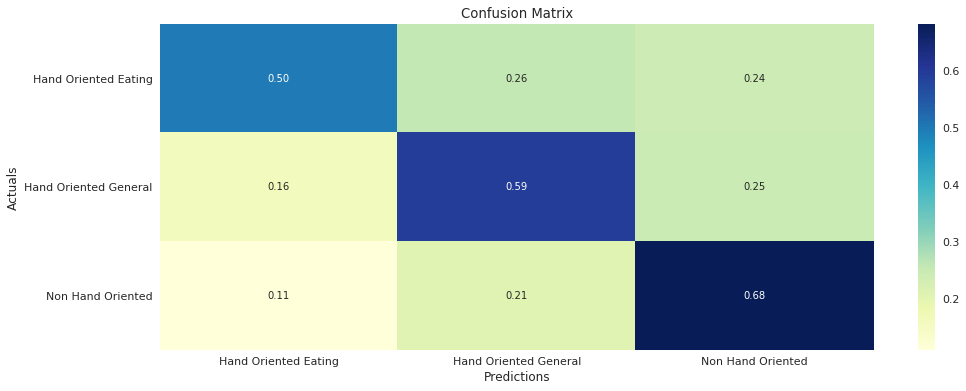

In [86]:
evaluate_metrics(test_y, test_y_preds)

In [94]:
KNN_estimator = SKLearn(entry_point='train_knn.py',
                            role=role,
                            train_instance_type='ml.m4.4xlarge',
                            train_instance_count=1,
                            output_path=output_path,
                            framework_version='0.20.0',
                            sagemaker_session=sagemaker_session,
                            hyperparameters = { 'n_neighbors': 13 })

In [95]:
%%time

# Train your estimator on S3 training data
KNN_estimator.fit({'train': input_data})

2020-01-24 19:36:48 Starting - Starting the training job...
2020-01-24 19:36:49 Starting - Launching requested ML instances...
2020-01-24 19:37:44 Starting - Preparing the instances for training...
2020-01-24 19:38:18 Downloading - Downloading input data......
2020-01-24 19:39:12 Training - Training image download completed. Training in progress..2020-01-24 19:39:12,786 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-01-24 19:39:12,789 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-01-24 19:39:12,802 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-01-24 19:39:13,013 sagemaker-containers INFO     Module train_knn does not provide a setup.py. 
Generating setup.py
2020-01-24 19:39:13,014 sagemaker-containers INFO     Generating setup.cfg
2020-01-24 19:39:13,014 sagemaker-containers INFO     Generating MANIFEST.in
2020-01-24 19:39:13,014 sagemaker-containers INFO     Installing m

In [96]:
%%time

# deploy your model to create a predictor
KNN_predictor = KNN_estimator.deploy(instance_type='ml.m4.xlarge',
                                     initial_instance_count=1)

--------------------------------------------------------------!CPU times: user 333 ms, sys: 5.62 ms, total: 338 ms
Wall time: 5min 12s


Accuracy: 0.622


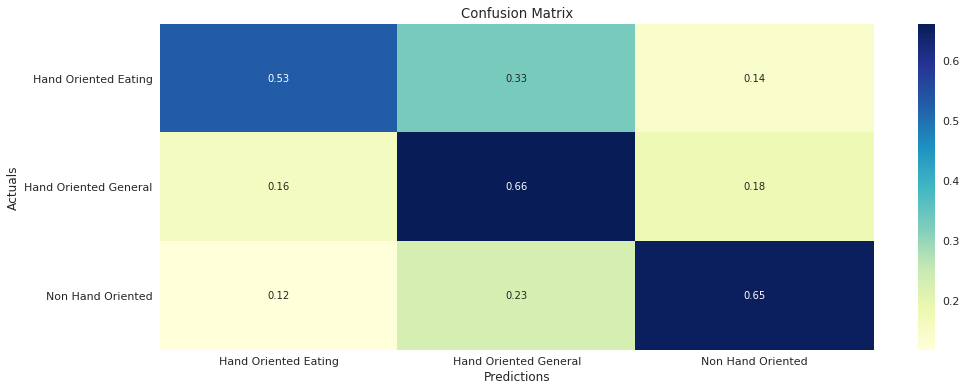

In [97]:
test_y_preds = KNN_predictor.predict(test_x)
evaluate_metrics(test_y, test_y_preds)

In [98]:
KNN_predictor.delete_endpoint()